# pandas 基础 https://www.bilibili.com/video/BV13a4y1e7za/?spm_id_from=333.999.0.0&vd_source=35453f4f4100cd5b053b3a819aeb7954 

# 1.数据的生成与导入

In [2]:
import pandas as pd
import numpy as np
# 加上这两行可以一次性输出多个变量而不用print
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# 查看版本
pd.__version__
pd.set_option('display.max_columns', None)

## 读取/加载数据

In [6]:
#读取csv文件 
df_csv= pd.read_csv('/users/lianjieting/gi/venv/data/test.csv')
df_csv.head()

,maxl,avgl,region,rrate,ind,catl,plts,pltrs,ots,blcl,status,trf,ur
0,209,29.0,ne,0.0,type2,type1,False,True,False,type1,Type1,Type3,False
1,459,52.0,sw,1.0,type5,type1,False,True,False,type2,Type3,Type4,False
2,68,53.0,ct,0.0,type3,type1,False,True,False,type2,Type5,Type4,True
3,387,49.0,sw,0.0,type4,type1,False,True,False,type1,Type2,Type2,False
4,207,29.0,ne,0.0,type2,type1,False,True,False,type1,Type2,Type4,True


In [3]:
#读取csv文件 + 不要索引
df_csv= pd.read_csv('/users/lianjieting/gi/venv/data/test.csv',index_col=0)
df_csv.head()

,avgl,region,rrate,ind,catl,plts,pltrs,ots,blcl,status,trf,ur
maxl,,,,,,,,,,,,
209,29.0,ne,0.0,type2,type1,False,True,False,type1,Type1,Type3,False
459,52.0,sw,1.0,type5,type1,False,True,False,type2,Type3,Type4,False
68,53.0,ct,0.0,type3,type1,False,True,False,type2,Type5,Type4,True
387,49.0,sw,0.0,type4,type1,False,True,False,type1,Type2,Type2,False
207,29.0,ne,0.0,type2,type1,False,True,False,type1,Type2,Type4,True


In [ ]:
#读取txt文件，直接读取可能会出现数据都挤在一列上
df_txt = pd.read_table('./data./table.txt')
#df_txt = pd.read_table('./data./table.csv', sep=",")
df_txt.head()

In [ ]:
#读取xls/xlsx文件
df_excel = pd.read_excel('./data./table.xlsx')
df_excel.head()

In [ ]:
#读取多个文件并合成一个新文件
import glob
#设置文件的路径
path='/user/lianjieting/desketop /python/data/data2'
#合并多个数组
all_files=glob.glob(path+'/*.csv')
all_data=[]
for filename in all_files:
        df=pd.read_csv(filename,index_col=None,header=0)
        all_data.append(df)
data2=pd.concat(all_data,axis=0,ignore_index=True)

# 2.数据信息查看

In [17]:
data=df_csv

In [18]:
#查看数据规模（维度）
data.shape

(4999, 13)

In [19]:
#查看各变量的数据类型
data.dtypes

maxl        int64
avgl      float64
region     object
rrate     float64
ind        object
catl       object
plts       object
pltrs      object
ots        object
blcl       object
status     object
trf        object
ur         object
dtype: object

In [ ]:
#查看数据整体信息
data.info()

In [ ]:
#查看数据描述
    #可以得到连续型数据的均值、最大值、最小值、中位数、四分位、总数、标准差等。
    #通过描述分析查看出数据中有无极端值，并将极端值剔除。一般可以初步筛查时使用。
data.describe

In [ ]:
#列名  
data.columns

In [ ]:
#查看某列唯一值个数
data['region'].unique()

In [ ]:
#查看某列唯一值个数
data['region'].value()

In [ ]:
#查看前XX行
data.head(20)

In [ ]:
#查看后5行
#data.tail()
data.tail(n=20)

# 3.数据清洗和预处理等步骤

## 3.1缺失值

In [10]:
#查看空值，判断哪些列是否存在缺失值 
    #axis=0为列的意思，axis=1为行的意思
data.isnull().any(axis=0)

maxl      False
avgl       True
region     True
rrate      True
ind        True
catl       True
plts       True
pltrs      True
ots        True
blcl       True
status     True
trf        True
ur         True
dtype: bool

In [11]:
#含有缺失值的行
    #axis=0为列的意思，axis=1为行的意思
data.isnull().any(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
4994    False
4995    False
4996    False
4997    False
4998    False
Length: 4999, dtype: bool

In [15]:
#全部为空的行
data.isnull().all(axis=1)

data.isnull().all(axis=1).sum()#全部为空的行有几个

0       False
1       False
2       False
3       False
4       False
        ...  
4994    False
4995    False
4996    False
4997    False
4998    False
Length: 4999, dtype: bool

0

In [24]:
#定位缺失值所在的行
data.loc[data.isnull().any(axis=1)]

,maxl,avgl,region,rrate,ind,catl,plts,pltrs,ots,blcl,status,trf,ur
11,69,48.0,ct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,283,32.0,ne,0.0,type2,type1,False,NaN,False,type1,Type1,Type5,True
27,258,31.0,ne,0.0,type2,type1,False,True,NaN,type1,Type4,Type5,False
29,231,28.0,ne,0.0,type2,type2,NaN,True,False,type1,Type4,Type4,False
31,288,32.0,ne,0.0,type2,NaN,False,True,False,type1,Type3,Type4,False
38,61,50.0,ct,0.0,type3,type5,False,NaN,False,type1,Type3,Type4,True
44,48,55.0,ct,0.0,type3,type5,False,True,False,type1,NaN,Type1,True
45,517,42.0,nw,0.0,type3,type5,NaN,True,False,type1,Type5,Type5,False
46,279,32.0,NaN,NaN,type2,type5,False,True,False,type1,Type4,Type3,False
54,62,54.0,ct,1.0,type3,NaN,NaN,NaN,NaN,type1,Type4,Type2,False


In [13]:
#各变量中缺失值的数量
data.isnull().sum(axis=0)

maxl       0
avgl       3
region     5
rrate     12
ind       13
catl      25
plts      23
pltrs     26
ots       22
blcl      21
status    16
trf        6
ur         4
dtype: int64

## 3.2缺失值处理（填充/删掉）

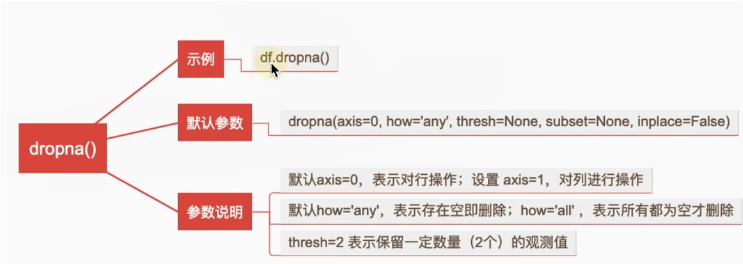

删除

In [26]:
#当空值占比不大的时候，直接将所有含有nan的删掉
data2 = data.isnull().mean()

In [25]:
#直接删除空值数据所在行
data3=data.dropna(axis=0,how="any")
data3 #展示

,maxl,avgl,region,rrate,ind,catl,plts,pltrs,ots,blcl,status,trf,ur
0,209,29.0,ne,0.0,type2,type1,False,True,False,type1,Type1,Type3,False
1,459,52.0,sw,1.0,type5,type1,False,True,False,type2,Type3,Type4,False
2,68,53.0,ct,0.0,type3,type1,False,True,False,type2,Type5,Type4,True
3,387,49.0,sw,0.0,type4,type1,False,True,False,type1,Type2,Type2,False
4,207,29.0,ne,0.0,type2,type1,False,True,False,type1,Type2,Type4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,578,34.0,sw,0.0,type2,type5,False,False,False,type1,Type3,Type4,True
4995,373,35.0,sw,0.0,type2,type5,False,False,False,type1,Type1,Type1,True
4996,295,56.0,se,0.0,type2,type5,True,False,False,type1,Type5,Type2,False
4997,516,33.0,sw,0.0,type4,type5,False,False,False,type1,Type1,Type1,True


填充

--fillna

In [ ]:
#定义缺失值为0，不覆盖原始数据
data_null_0=data.fillna(0,inplace=False)
data_null_0 

In [ ]:
#对缺失值进行填充（用中位数或平均数）mode-众数
data_null_value=data.fillna(value={'avgl':data['avgl'].mode()[0],
                                  'ind':data[ind].mean()},
                           inplace=False)

In [ ]:
#原始数据
data_null

In [ ]:
#最后的数据

--replace

--sklearn 数据预处理方法

In [21]:
#https://www.bilibili.com/video/BV1wY4y187Za/?spm_id_from=333.788&vd_source=35453f4f4100cd5b053b3a819aeb7954

## 处理重复数据

In [ ]:
data_du=pd.read_csv('/users/lianjieting/gi/venv/data/test.csv')

In [ ]:
data_du

In [ ]:
#判断数据中是否存在重复值
data_du.duplicated().any

In [ ]:
#删除重复值，会删除第一条后的，默认对所有变量判断
data_du.drop_duplicates()

In [ ]:
#指定变量判断,first保留第一个，inplace=True对原始数据修改
data_du.drop_duplicates(subset=['l1','l2'],keep='first',inplace=False)


# 4.数据提取与筛选

In [ ]:
#增加索引
data['index']=data.index
data.head()

In [ ]:
#增加一列
data['ifrelate']=data['rrate']
data.head()

In [ ]:
#删除特定列
data.drop(columns='rrate')
data.head()

In [ ]:
#删除特定行--可以根据索引删除行
data.drop(index=1,axis=1)

In [ ]:
#删除特定几行--根据索引删除
data.drop(index=[1,2,3],axis=1)

In [ ]:
#将特定数值筛选出来
data['ifrelate'].isin(["1.0"])
data[data['ifrelate'].isin(["1.0"])]

In [ ]:
#将特定不包含的数值筛选出来
data[~data['ifrelate'].isin(["1.0"])]

In [ ]:
#将特定列的数据在某一区间之内的值筛选出来
data[data['ifrelate'].isin(list(range(0,200)))]

# 5.数据排序

In [ ]:
#值排序：从小到大，一列值
data.sort_values(by='maxl')

In [ ]:
#值排序：从小到大，两列值
data.sort_values(by=['maxl','avgl'])

In [ ]:
#值排序：从大到小
data.sort_values(by='maxl',ascending=False)

In [ ]:
#索引排序
data.sort_index('index',ascending=False)

# 6.数据汇总

In [ ]:
#平均&groupby
phone_length=data.groupby(['region'])['maxl'].mean()
phone_length

In [ ]:
#将输出数据重新以列表的形式输出
phone_length=data.groupby(['region'])['maxl'].mean().reset_index()
phone_length

In [ ]:
#多个group by
phone_length=data.groupby(['region','ind'])['maxl'].mean().reset_index()

# 7.数据标准化


In [ ]:
x=data['maxl']

In [ ]:
import numpy as np

## [0,1]标准化

[0,1]标准化是最基本的一种数据标准化方法

In [ ]:
def maxminnormalization(x):
    x=(x-np.min(x))/(np.max(x)-np.min(x))
    return x

In [ ]:
maxminnormalization(x)

In [ ]:
x=maxminnormalization(x).reset_index()
x

## z-score标准化

In [ ]:
def zscorenormalization(x):
    x=(x-np.mean(x))/np.std(x)
    return x

In [ ]:
y=zscorenormalization(x).reset_index()
y

# 8.数据存储 （将结果输出到csv、txt、xls、xlsx文件中）


In [ ]:
df.to_csv('./new table.csv')
df.to_excel('./new table.xlsx')